# Decision Trees, Ensemble Learning and Random Forests

In [1]:
# Imports required packages

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

### Decision Tree Classification

In [2]:
# Loads Iris data
iris = load_iris()

# Checks the keys associated with dataset object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# Checks the shape of the data
print(iris.data.shape)

(150, 4)


In [4]:
# Checks for the features and their location in the array
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Prints targets
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# Creating DataFrame out of n-dim array
iris_df = pd.DataFrame({
    iris.feature_names[0]: iris.data[:,0],
    iris.feature_names[1]: iris.data[:,1],
    iris.feature_names[2]: iris.data[:,2],
    iris.feature_names[3]: iris.data[:,3],
    "plant_type": list(map(lambda i: iris.target_names[i], iris.target))
})

# Displays the DataFrame
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),plant_type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# Prepare training data
X = iris.data[:, 2:]  # Considering only petal length and width

y = iris.target  # target is of int

In [8]:
# Instantiate Decision Tree classifier with hyperparameter 'max_depth' as 2
decision_tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fits the model
decision_tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

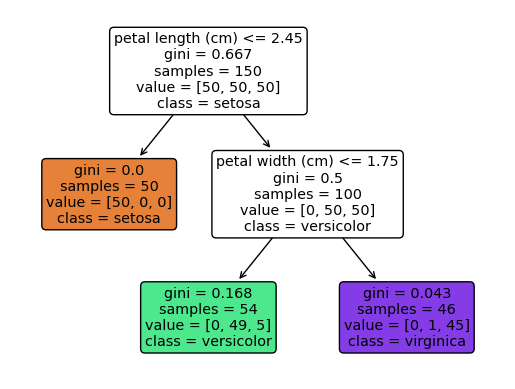

In [9]:
# Plots the Decision Tree
plot_tree(
    decision_tree_clf, 
    feature_names= iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)

In [10]:
# Performing predictions

# Estimates the probabilities for a flower's petal having length 5 cm long and 1.5 cm wide.
print("Prediction probabilities: ", print(decision_tree_clf.predict_proba([[5, 1.5]])))

# Predicts class for the same flower.

print("Predicted Class: ", decision_tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
Prediction probabilities:  None
Predicted Class:  [1]


### Decision Tree Regression

In [11]:
# First creating non-linear (quadratic) noisy data set

m = 200    # Number of data instances

X = np.random.rand(m, 1)
y = (4 * (X - 0.5)**2) + (np.random.randn(m, 1) / 10)

In [12]:
# Prints mean of y
print("Mean of y:", np.mean(y))

Mean of y: 0.3277458148099443


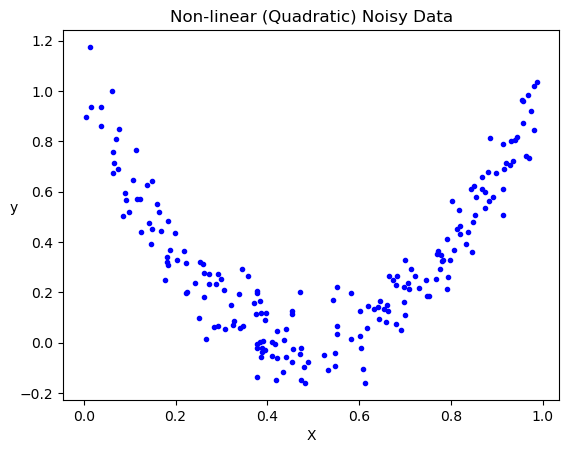

In [13]:
# Plots the noisy data

plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y", rotation=False)
plt.title("Non-linear (Quadratic) Noisy Data")
plt.show()

In [14]:
# Instantiate Decision Tree Regressor with hyperparameter 'max_depth' as 2

# Initializes DecisionTreeRegressor model
decision_tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

# Fits the model
decision_tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x <= 0.85\nsquared_error = 0.092\nsamples = 200\nvalue = 0.328'),
 Text(0.25, 0.5, 'x <= 0.173\nsquared_error = 0.067\nsamples = 168\nvalue = 0.25'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.036\nsamples = 29\nvalue = 0.675'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.028\nsamples = 139\nvalue = 0.161'),
 Text(0.75, 0.5, 'x <= 0.938\nsquared_error = 0.023\nsamples = 32\nvalue = 0.739'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.008\nsamples = 20\nvalue = 0.647'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.01\nsamples = 12\nvalue = 0.891')]

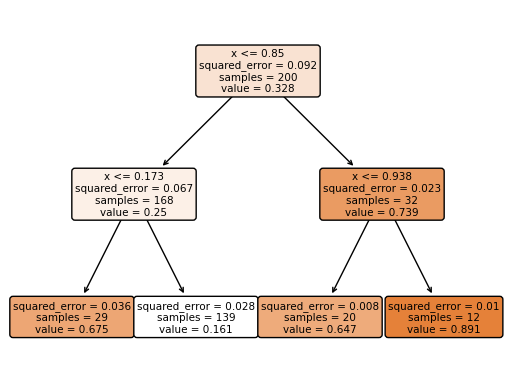

In [15]:
# Plots the Decision Tree
plot_tree(
    decision_tree_reg, 
    feature_names= ["x"],
    rounded=True,
    filled=True)

In [16]:
# Performing prediction

# Predicting value for instance with x = 0.6
print("Predicted value: ", decision_tree_reg.predict([[0.6]]))

Predicted value:  [0.1607291]


#### Regularizing Decision Tree Regressor
Decision Tree Regressor, too, can overfit itself to the training data. Applying appropriate regularization may result a reasonable model.

In [17]:
# First creates two regressors, one with default hyperparameters and
# other one with hyperparameter min_samples_leaf set to 10.

decision_tree_reg_default = DecisionTreeRegressor(random_state=42)
decision_tree_reg_regularized = DecisionTreeRegressor(
    min_samples_leaf=10, random_state=42)

In [18]:
# Fits both the models
decision_tree_reg_default.fit(X, y)
decision_tree_reg_regularized.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

In [19]:
# Now, creates 500 data points evenly spaced over a specified range

x1 = np.linspace(0, 1, num=500).reshape(-1, 1)

# And, performs prediction by both the regressor
predictions_by_default_model = decision_tree_reg_default.predict(x1)
predictions_by_regularized_model = decision_tree_reg_regularized.predict(x1)

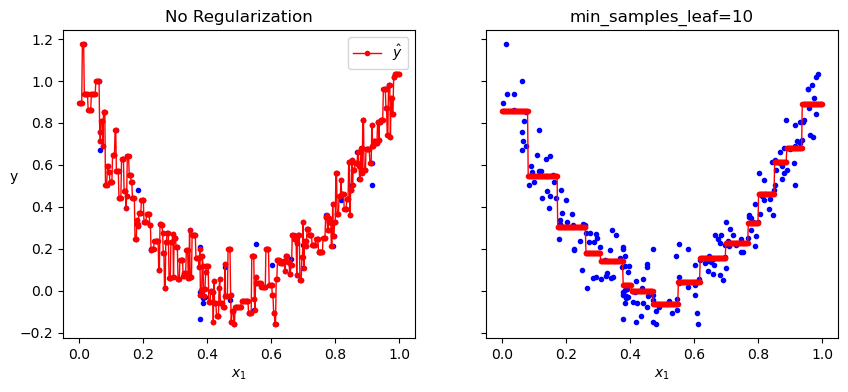

In [20]:
# Plots the predictions from both the regressor

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, predictions_by_default_model, "r.-", linewidth=1, label=r"$\hat{y}$")
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.legend()
plt.title("No Regularization")

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, predictions_by_regularized_model, "r.-", linewidth=1, label=r"$\hat{y}$")
plt.xlabel("$x_1$")
plt.title("min_samples_leaf={}".format(decision_tree_reg_regularized.min_samples_leaf))

plt.show()